<center><h1 style="color:#173F8A;"> Calculo I, MAT1640-2, 2022-1 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Facultad de Matematicas<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> Instituto de Ingenieria Matematica y Computacional<br></h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [2]:
class Riemann_sum:
    def __init__(self,f,a,b,xstar = 'right'):
        self.f = f
        self.a = a
        self.b = b
    def compute(self, n):
        self.n = n
        self.dx = (self.b-self.a)/n
        self.x = np.linspace(self.a,self.b,n+1)
        return sum(f(self.x)*self.dx)
    
    def plot(self, n):
        n  =int(n)
        self.n = n
        x = np.linspace(self.a,self.b, max(100,3*self.n))
        fig, ax = plt.subplots(1,1,figsize=(5,5))
        ax.plot(x,self.f(x),'C03',lw=3)
        
        
        self.dx = (self.b-self.a)/n
        self.x = np.linspace(self.a,self.b,n+1)
        
        for j in range(n):
            ax.plot([self.x[j],self.x[j], self.x[j+1], self.x[j+1], self.x[j]],[0,f(self.x[j+1]),f(self.x[j+1]),0,0],'C00', lw=1)
        
        plt.title('Riemann sum = %.4f' %self.compute(self.n),
          loc="left")
        
    # Animation
    def plot_fun(self, n=100):
        self.xplot = np.linspace(self.a,self.b, 300)
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        self.line, = ax.plot(self.xplot,self.f(self.xplot),'C03')
       
        return self.line, fig
    
    
        
       

## Ejemplo 1: $f(x) = x^{2}, \quad [0,1]$

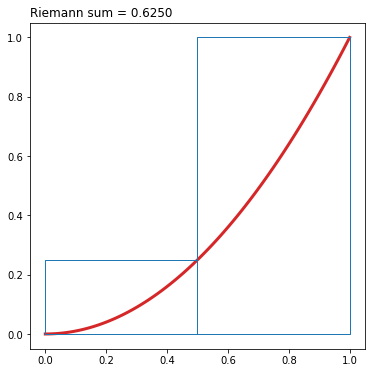

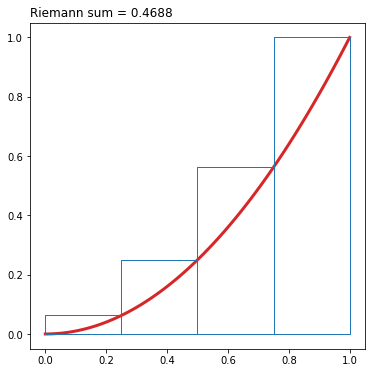

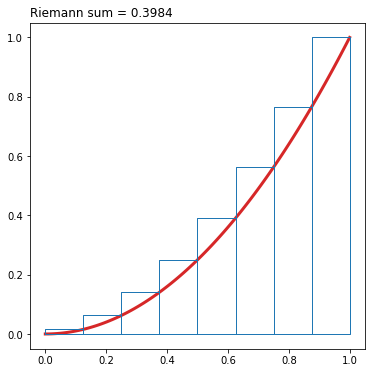

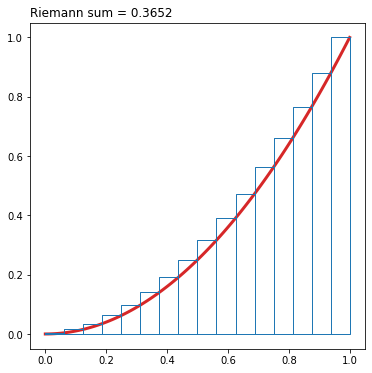

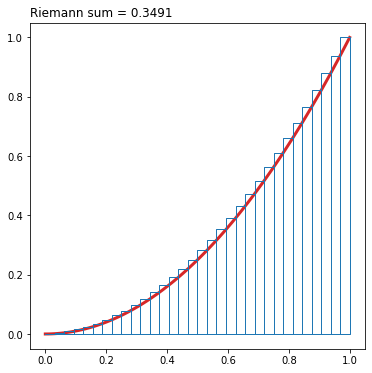

In [3]:
f = lambda x: x**2
R10 = Riemann_sum(f,a=0,b=1)
R10.plot(2)
R10.plot(4)
R10.plot(8)
R10.plot(16)
R10.plot(32)

<IPython.core.display.Javascript object>


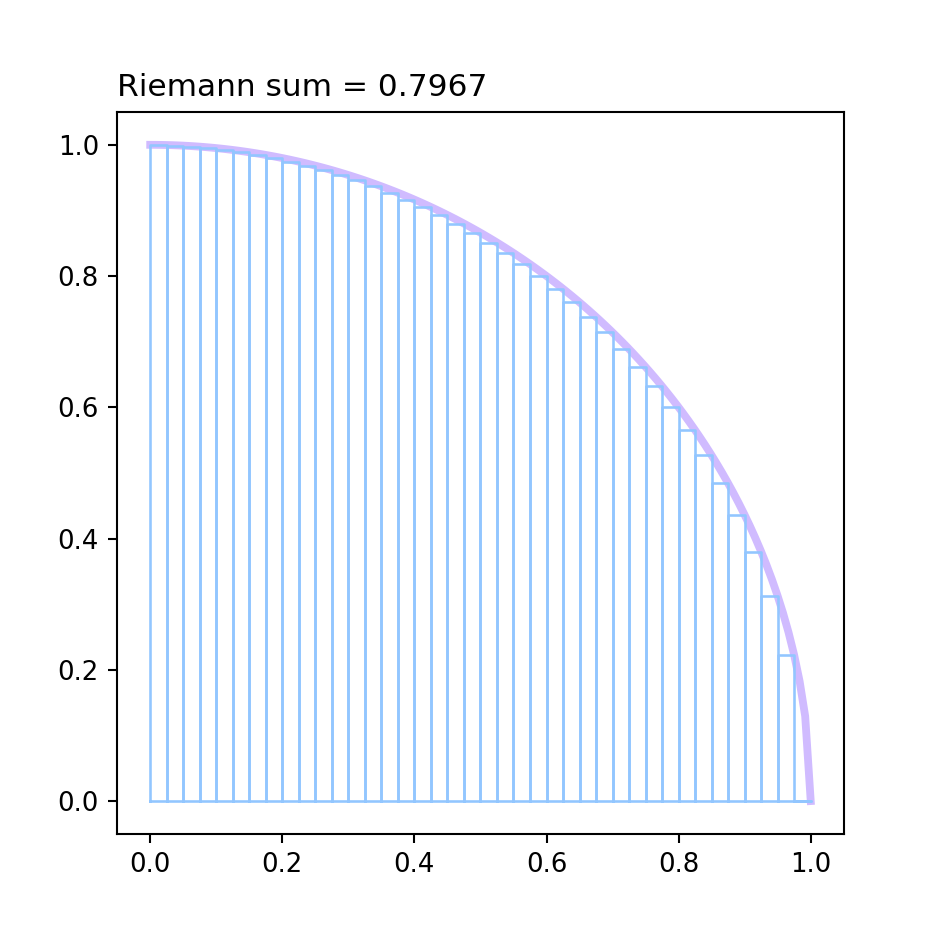

In [15]:
f = lambda x: np.sqrt(1-x**2)
R10 = Riemann_sum(f,a=0,b=1)
R10.plot(40)


<IPython.core.display.Javascript object>


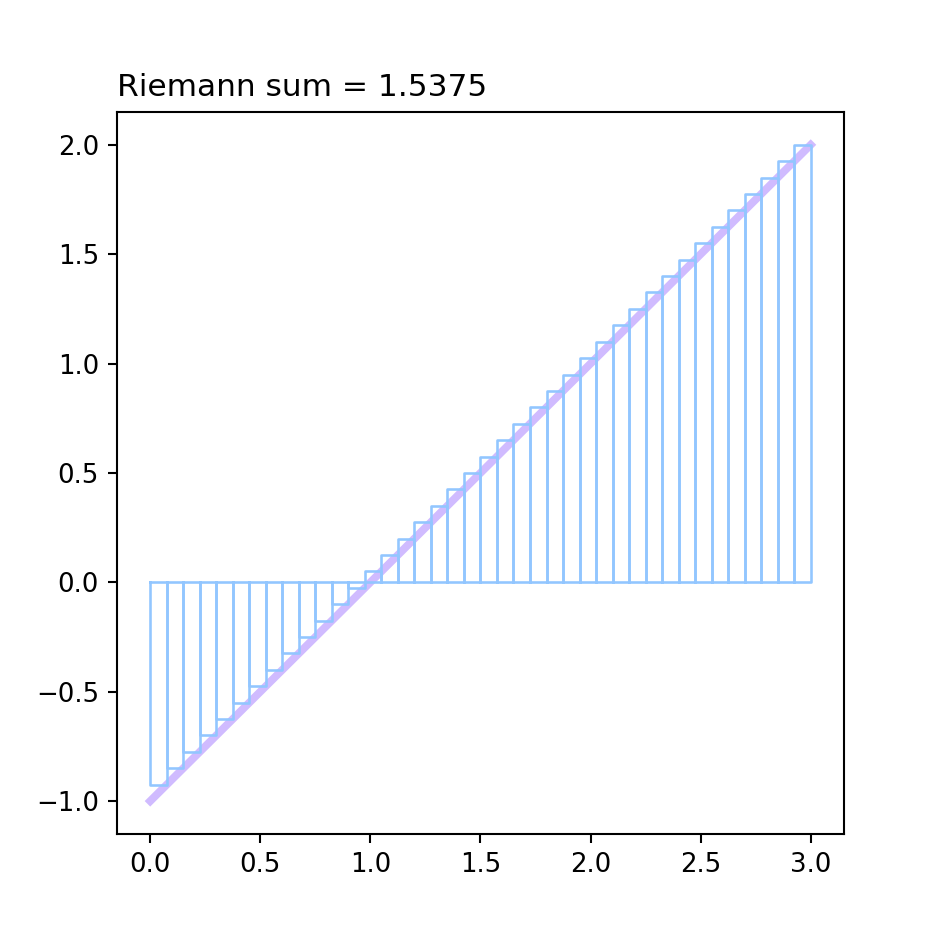

In [17]:
f = lambda x: (x-1)
R10 = Riemann_sum(f,a=0,b=3)
R10.plot(40)

## Ejemplo $f(x) = x^{3} - 6x$

<IPython.core.display.Javascript object>


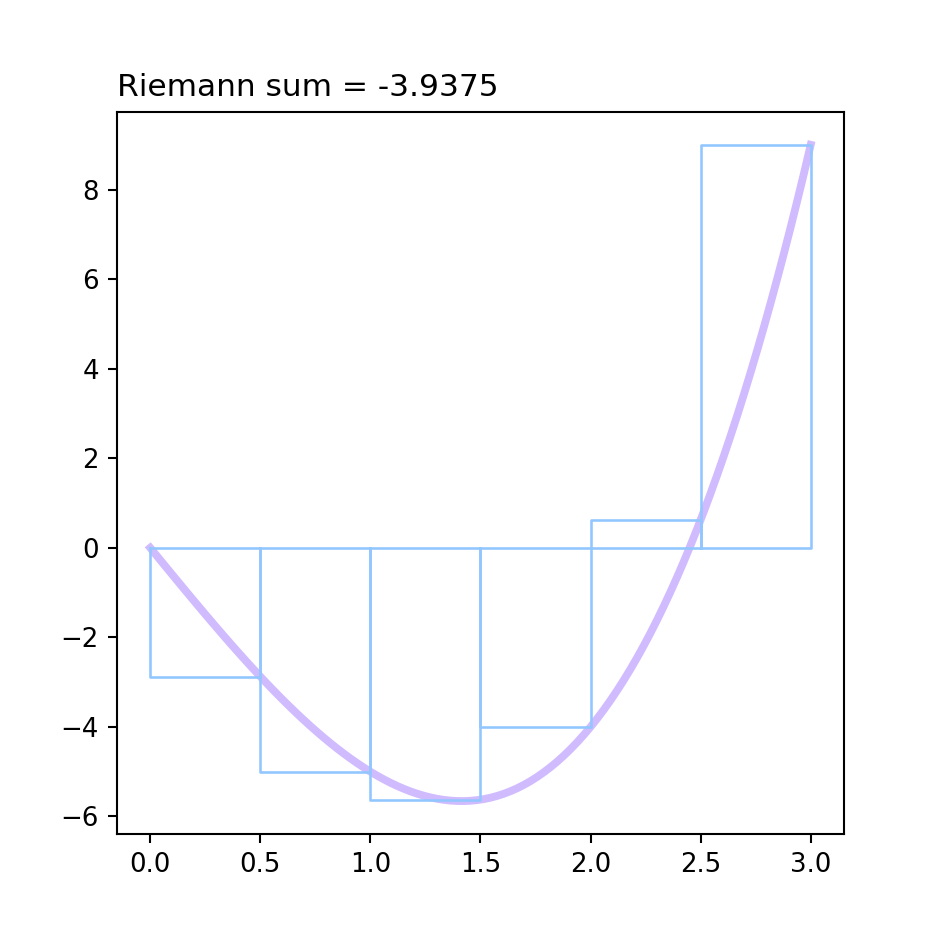

In [12]:
f = lambda x: x**3-6*x
R10 = Riemann_sum(f,a=0,b=3)
R10.plot(6)
#R10.plot(4)
#R10.plot(8)
#R10.plot(16)
#R10.plot(32)

## Ejemplo 2: $f(x) = \exp(x), \quad [1,3]$

<IPython.core.display.Javascript object>


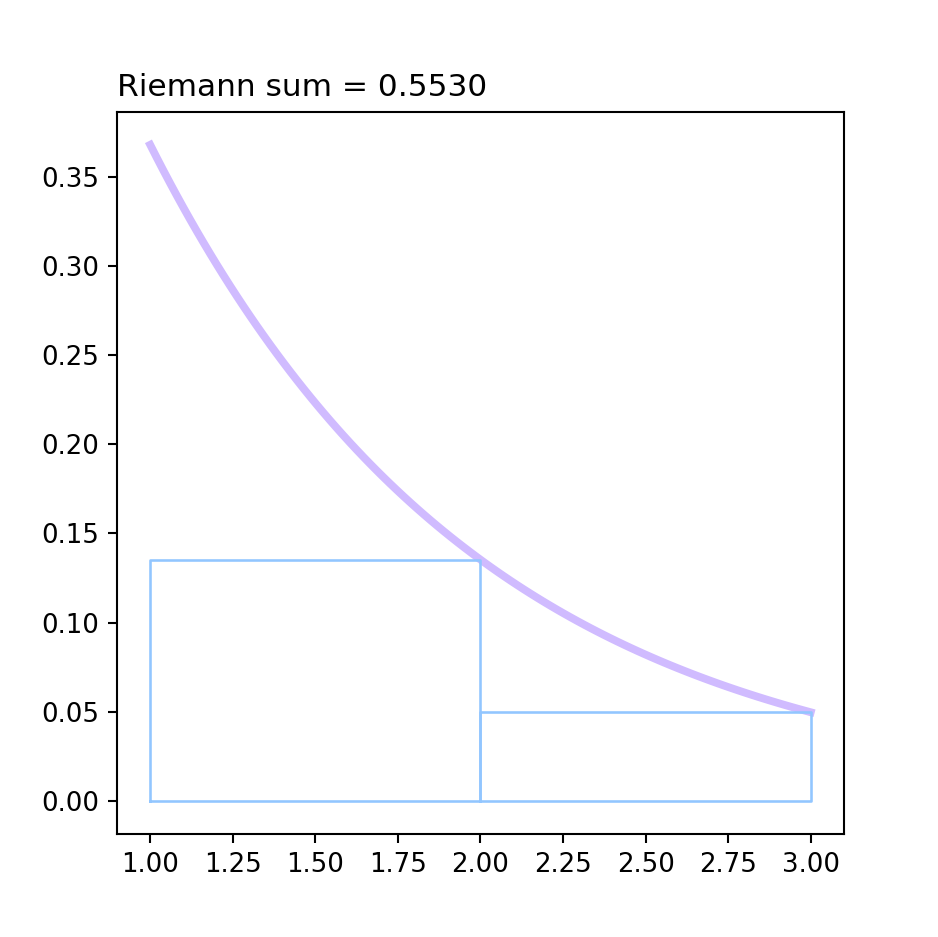

<IPython.core.display.Javascript object>


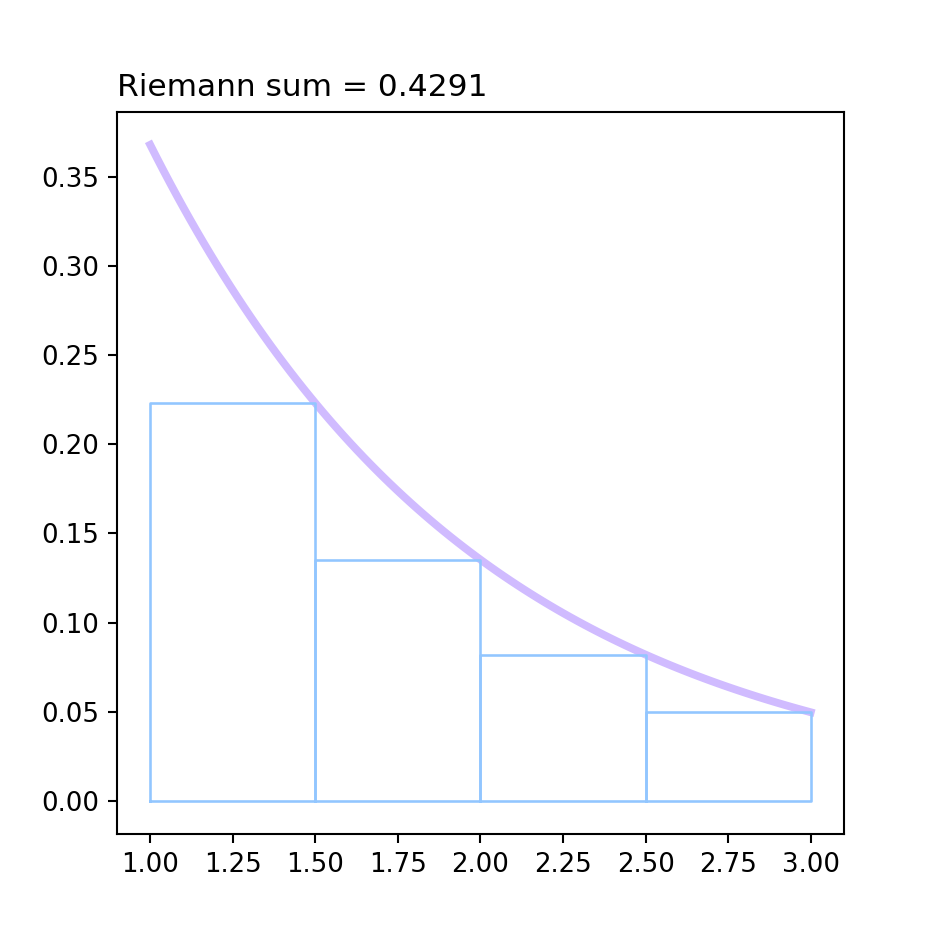

<IPython.core.display.Javascript object>


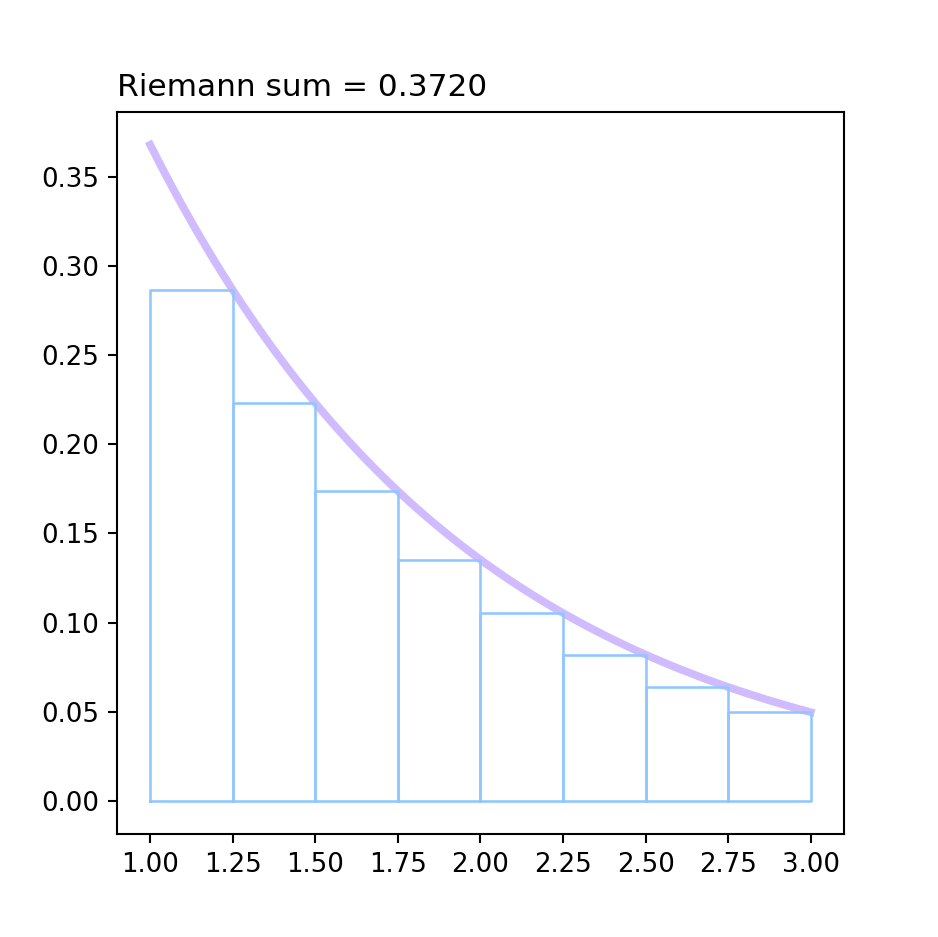

<IPython.core.display.Javascript object>


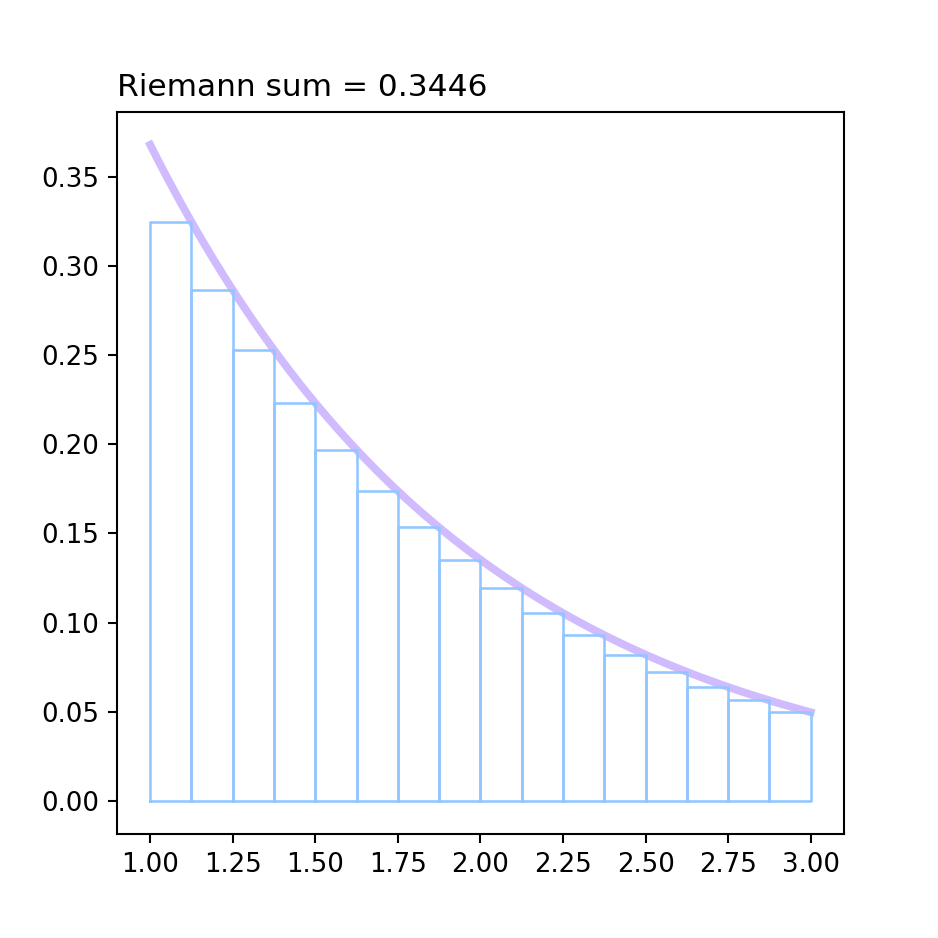

<IPython.core.display.Javascript object>


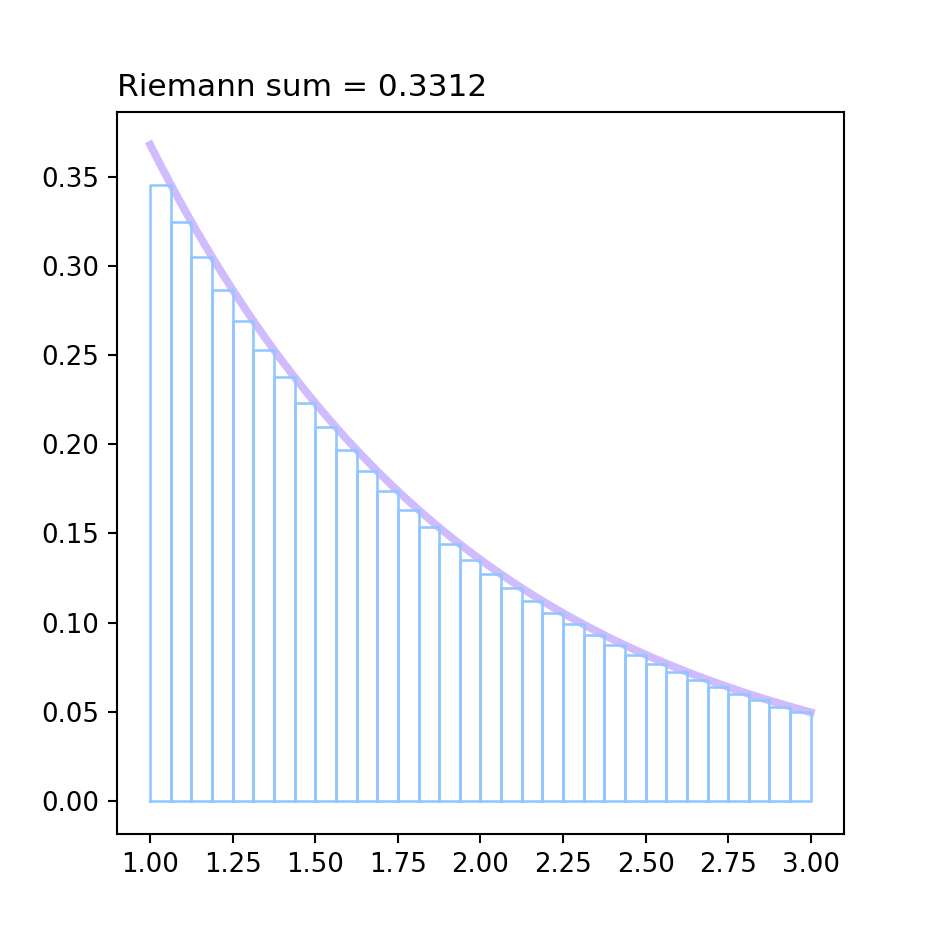

In [13]:
f = lambda x: np.exp(-x)
R10 = Riemann_sum(f,a=1,b=3)
R10.plot(2)
R10.plot(4)
R10.plot(8)
R10.plot(16)
R10.plot(32)

## Ejemplo 3: $f(x) = \exp(-x^2), \quad [0,1]$

<IPython.core.display.Javascript object>


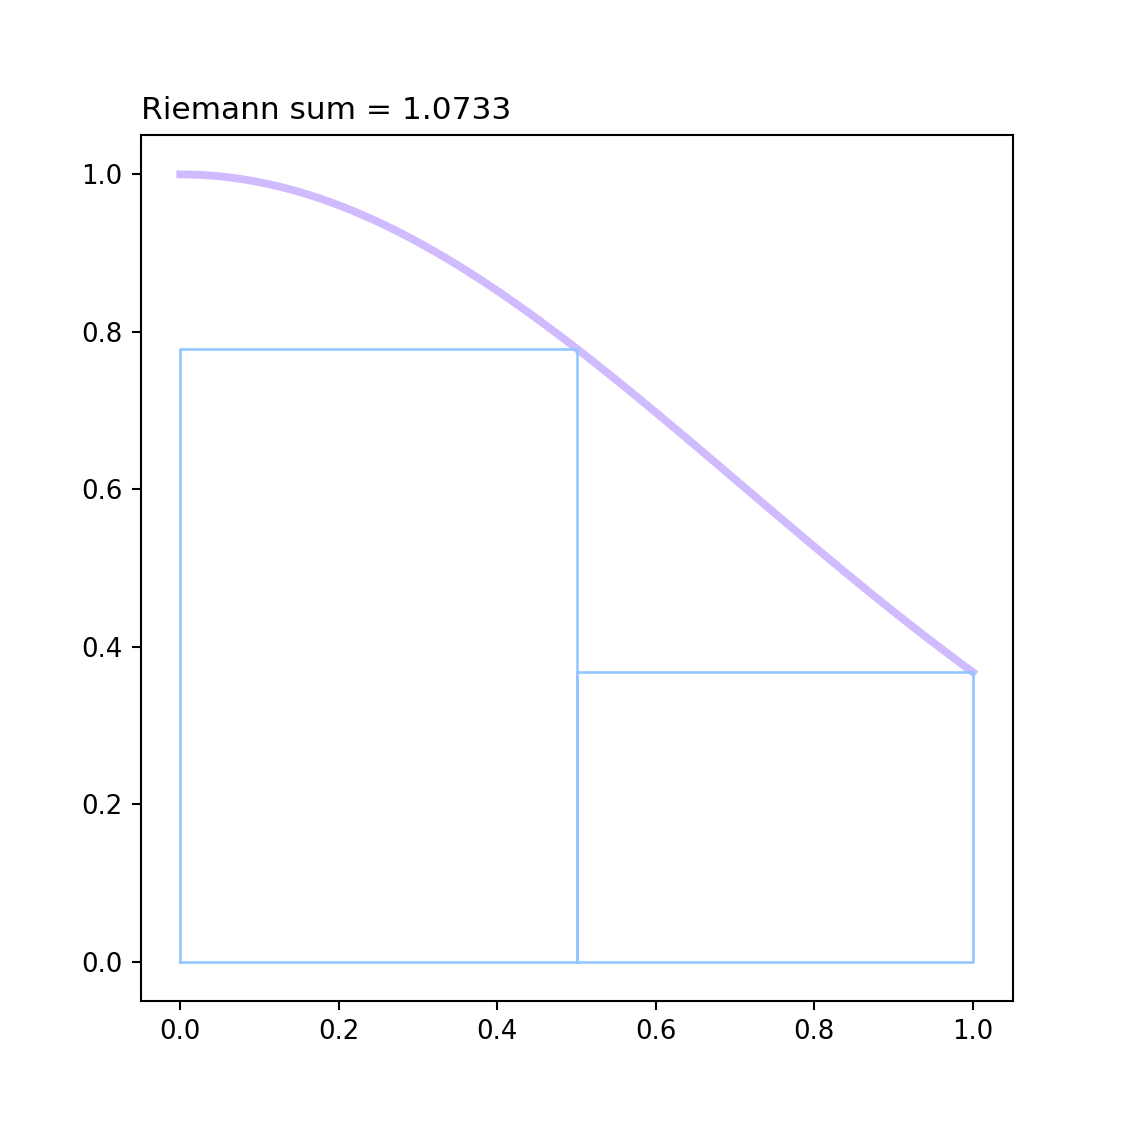

<IPython.core.display.Javascript object>


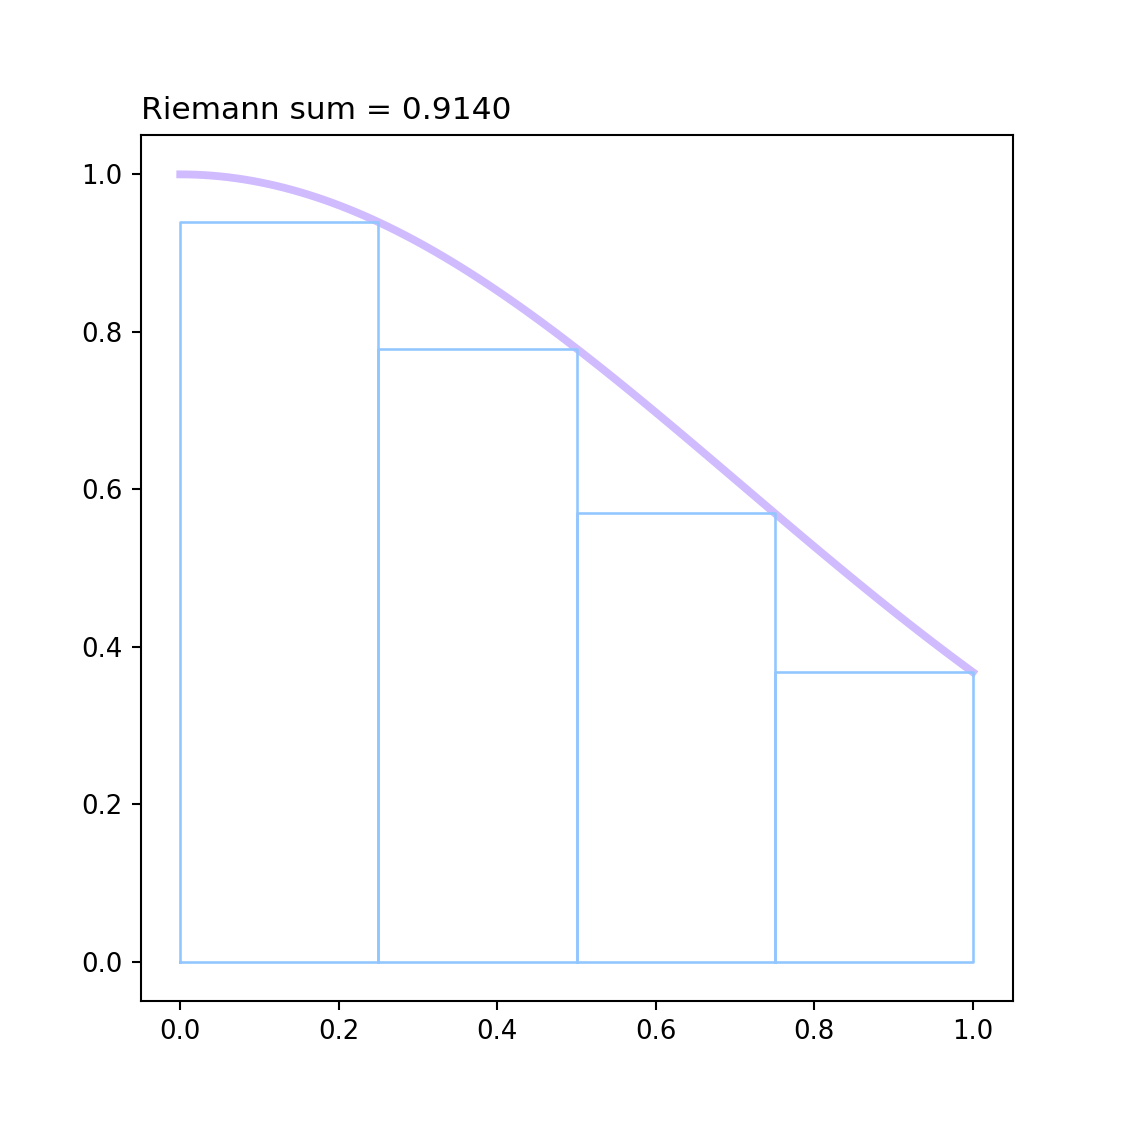

<IPython.core.display.Javascript object>


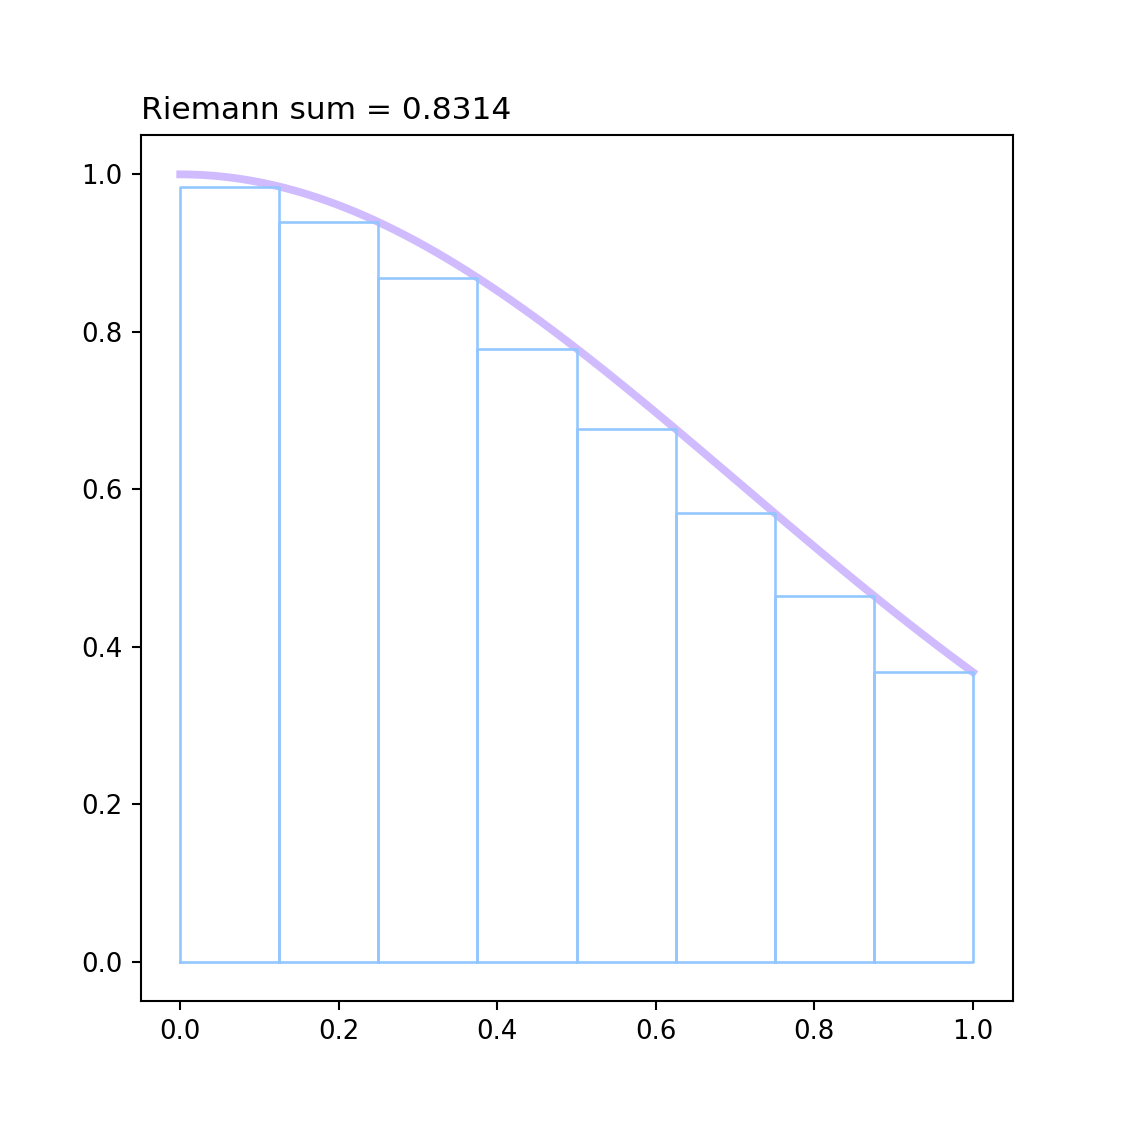

<IPython.core.display.Javascript object>


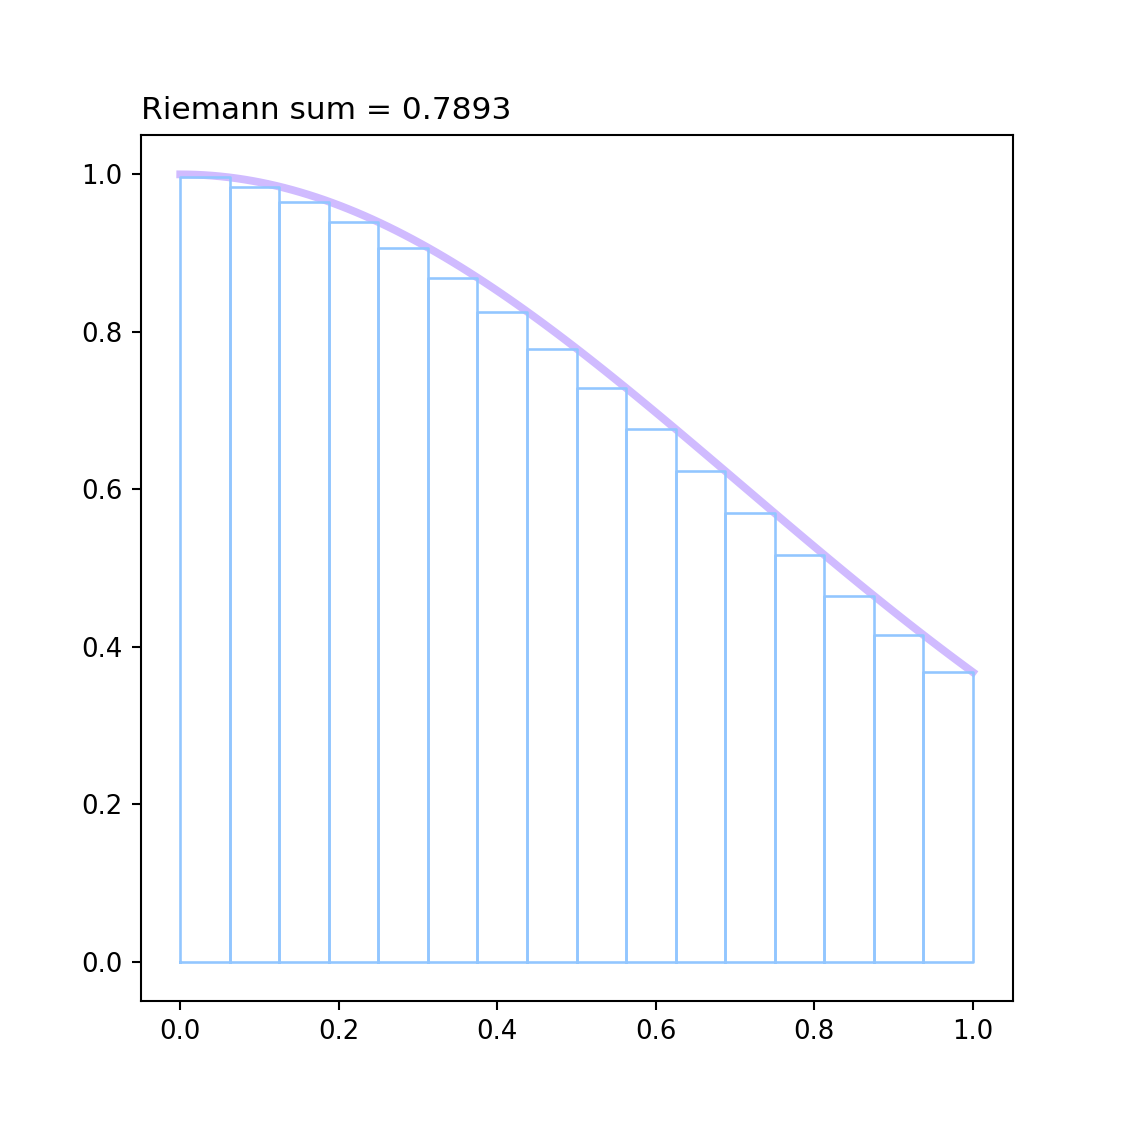

<IPython.core.display.Javascript object>


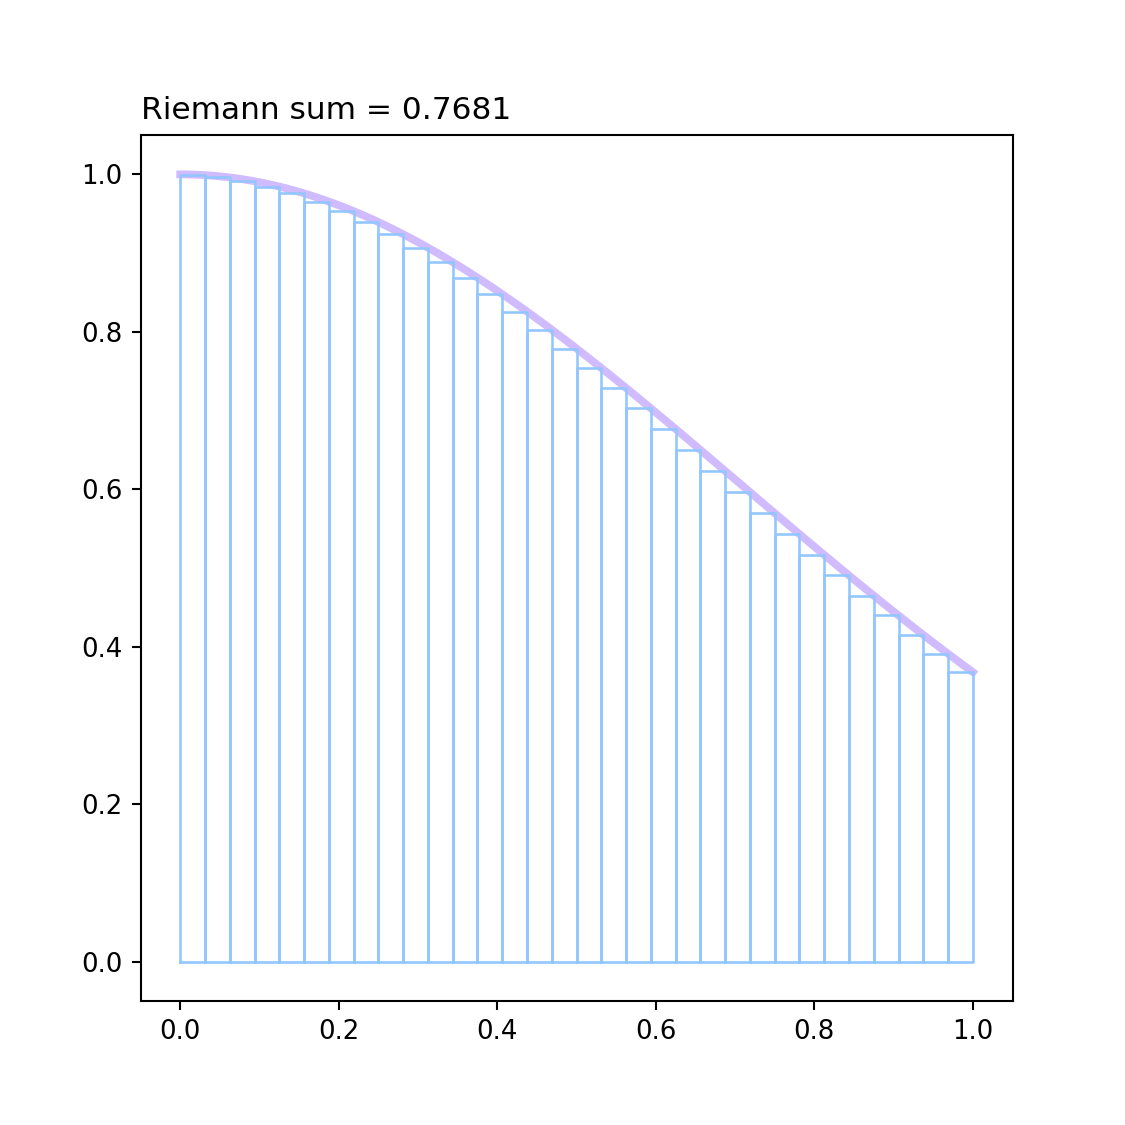

In [7]:
f = lambda x: np.exp(-x**2)
R10 = Riemann_sum(f,a=0,b=1)
R10.plot(2)
R10.plot(4)
R10.plot(8)
R10.plot(16)
R10.plot(32)

## Ejemplo $f(x) = \frac{x^{2}-1}{x^{2}+1}$

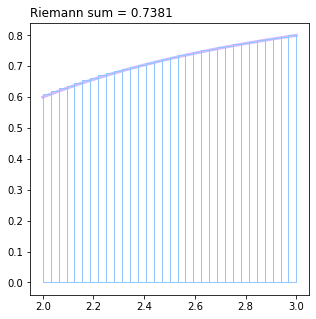

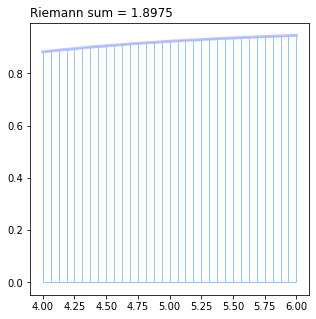

In [10]:
f = lambda x: (x**2-1)/(x**2+1)
xx = 1
Rxx1 = Riemann_sum(f,a=2*xx,b=3*xx)
Rxx1.plot(32)
xx = 2
Rxx2 = Riemann_sum(f,a=2*xx,b=3*xx)
Rxx2.plot(32)

## Ejemplo 4: $f(x) = 2x^{3}-6x + \frac{3}{x^{2}+1}$

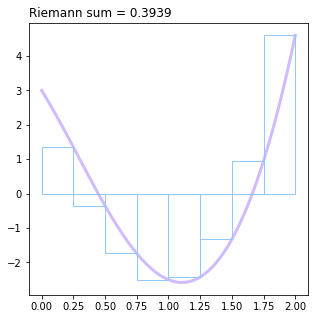

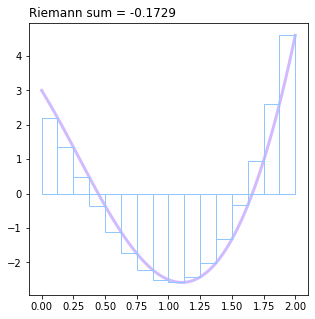

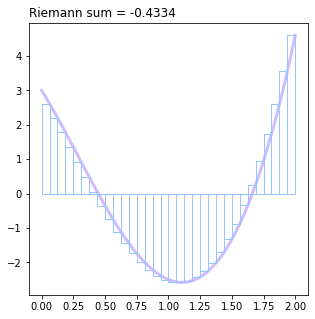

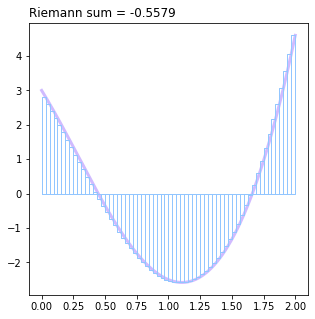

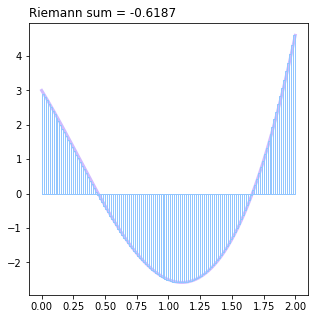

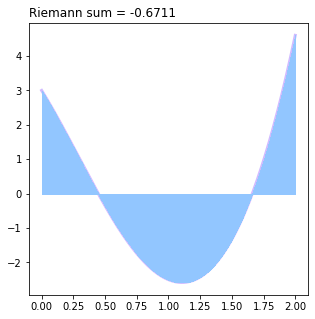

In [8]:
f = lambda x: 2*x**3-6*x+3.0/(x**2+1)
R = Riemann_sum(f,a=0,b=2)
R.plot(8)
R.plot(16)
R.plot(32)
R.plot(64)
R.plot(128)
R.plot(1024)

# Animacion

<IPython.core.display.Javascript object>


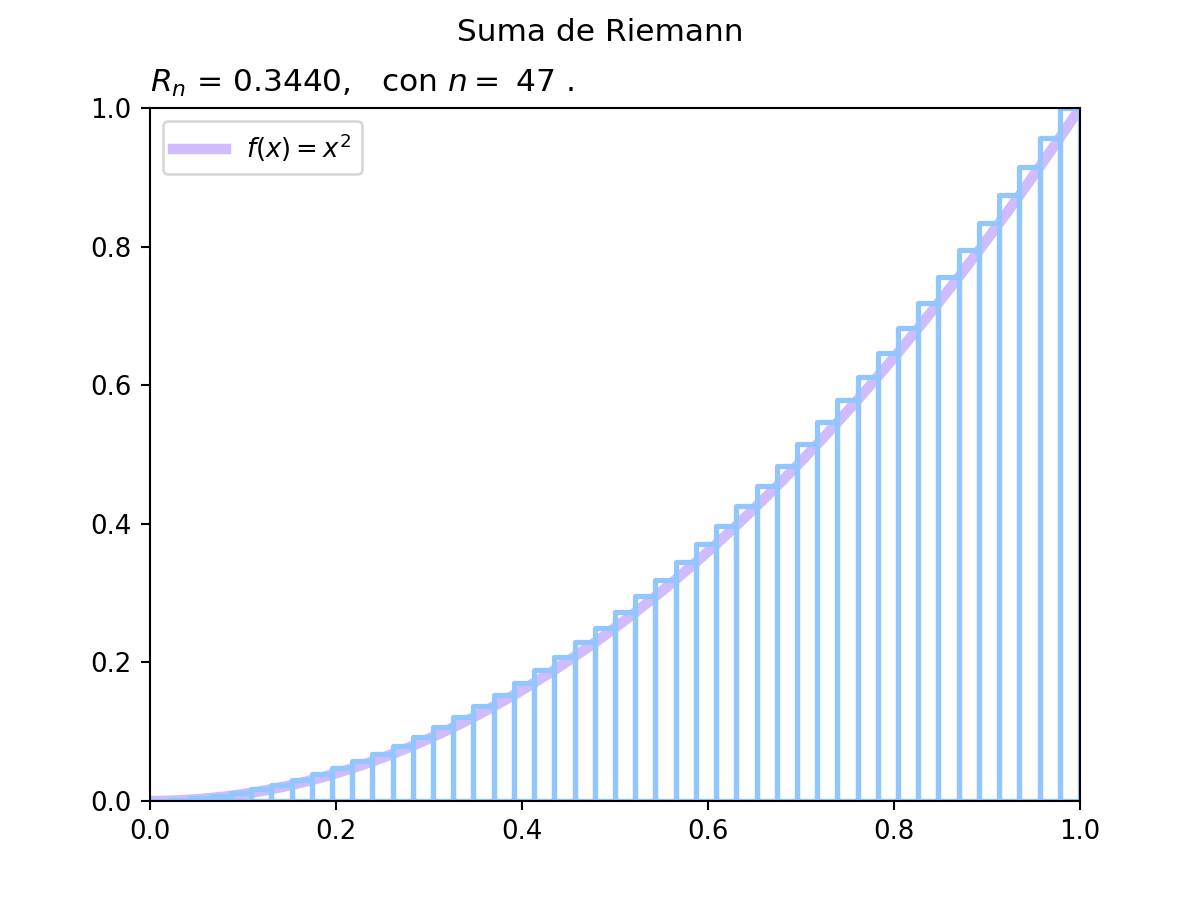

MovieWriter imagemagick unavailable; using Pillow instead.


In [126]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

f = lambda x: x**2
a = 0
b = 1
Rn = Riemann_sum(f,a=0,b=1)
Rn.compute(10)
xplot = np.linspace(a,b,300)
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
curve = ax.plot(xplot, f(xplot), 'C03',lw=4, label=r'$f(x) = x^{2}$')
ax.legend()
rect, = ax.plot([], [], lw=2)
N = np.linspace(1,100,100)
def init():
    rect.set_data([], [])
    return rect,
def animate(i):
    n = N[i]
    dx = (b-a)/n
    xv = np.linspace(a, b, int(n))
    xx = []
    yy = []
    for j in range(int(n)-1):
        xx.append([xv[j],xv[j], xv[j+1], xv[j+1],xv[j]])
        yy.append([0,f(xv[j+1]),f(xv[j+1]),0,0])
    rect.set_data(np.array(xx), np.array(yy))
    plt.suptitle('Suma de Riemann')
    plt.title(r'$R_n$ = %.4f' %Rn.compute(int(n))+',   con $n=$%3i .'%n,loc="left")
    return rect,

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=500, blit=True)
anim.save('xpow2.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


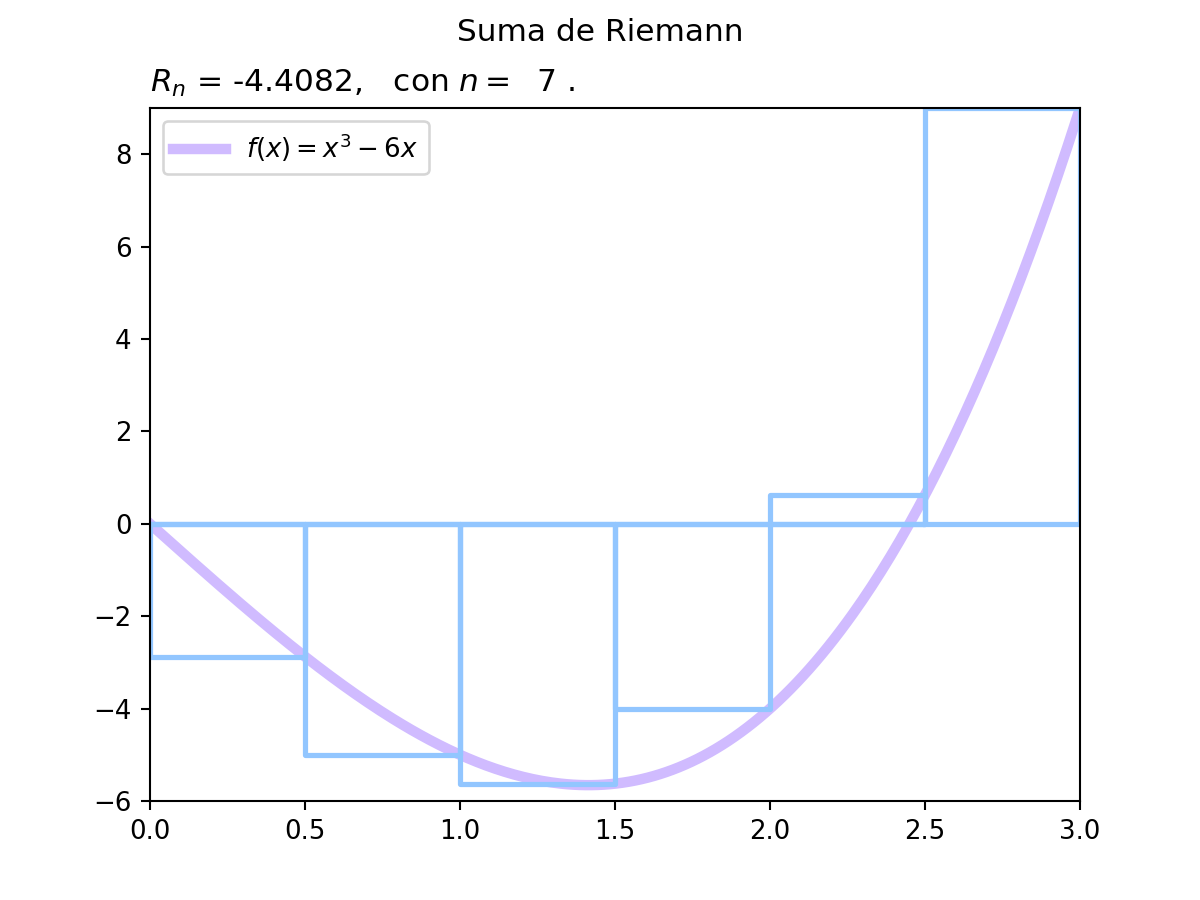

MovieWriter imagemagick unavailable; using Pillow instead.


In [130]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

f = lambda x: x**3-6*x
a = 0
b = 3
Rn = Riemann_sum(f,a,b)
xplot = np.linspace(a,b,300)
fig = plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-6, 9))
curve = ax.plot(xplot, f(xplot), 'C03',lw=4, label=r'$f(x) = x^{3}-6x$')
ax.legend()
rect, = ax.plot([], [], lw=2)
N = np.linspace(1,100,100)
def init():
    rect.set_data([], [])
    return rect,
def animate(i):
    n = N[i]
    dx = (b-a)/n
    xv = np.linspace(a, b, int(n))
    xx = []
    yy = []
    for j in range(int(n)-1):
        xx.append([xv[j],xv[j], xv[j+1], xv[j+1],xv[j]])
        yy.append([0,f(xv[j+1]),f(xv[j+1]),0,0])
    rect.set_data(np.array(xx), np.array(yy))
    plt.suptitle('Suma de Riemann')
    plt.title(r'$R_n$ = %.4f' %Rn.compute(int(n))+',   con $n=$%3i .'%n,loc="left")
    return rect,

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=500, blit=True)
anim.save('ex2.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


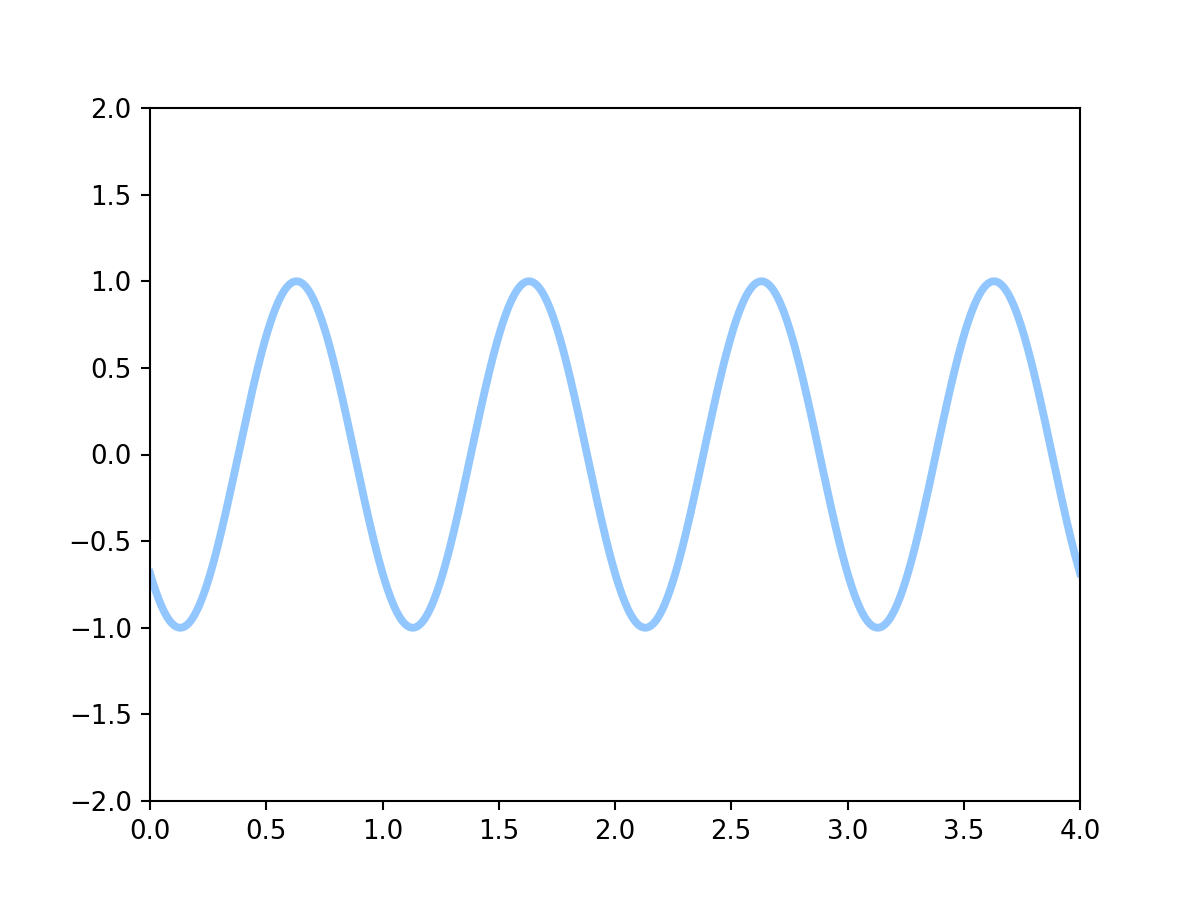

In [21]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

In [42]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  .. note::
 |  
 |      You must store the created Animation in a variable that lives as long
 |      as the animation should run. Otherwise, the Animation object will be
 |      garbage-collected and the animation stops.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied via the *fargs* parameter.
 |  
 |      The required signature is::
 |  
 |          def func(frame, *fargs) -> iterable_of_artists
 |  